<a href="https://colab.research.google.com/github/Catachavez02/DiploDatos-2022/blob/main/tp_diplo_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
#Con la siguiente función vemos todas las columnas del dataframe para luego 
#seleccionar las relevantes
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# 1. Seleccionar las columnas relevantes para analizar
1. Lenguajes de programación. 
2. Salario Bruto.
3. Salario Neto
4. Nivel de estudios.
5. Estado de nivel de estudios.
6. Años de experiencia.
7. Cantidad de empleados de la compañía
8.Género

Las variables elegidas para el análisis son: lenguajes de programación y el salario mensual bruto. Para evaluar el nivel de sueldos, se eligió trabajar con la variable salario bruto, por considerarla una medida más uniforme para su comparación ya que con ello, evitamos las distorsiones generadas por las retenciones de impuesto a las ganancias de cuarta categoría.

Para responder la pregunta en cuestión, vamos  a trabajar acotando el universo de análisis a los "lenguaje más populares", y los definimos como "aquellos lenguajes en donde se concentra el 80% de los casos encuestados". 

Analizaremos también otras variables que entendemos pueden influir en mayor o menor medida en el nivel de sueldos como: nivel de estudio y años de experiencia. 


In [ ]:
# se crea una columna estudios que es la combinación del nivel de estudios y su estado para simplificar el análisis
# dado que no se puede dejar de lado el estado en el cual se encuentran sus estudios. 
df['studies'] = df['profile_studies_level'].str.cat(df['profile_studies_level_state'], sep = ' ').str.lower()
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO', 'salary_monthly_NETO','studies', 'profile_years_experience', 'company_employee_number', 'profile_gender']


# 2. Seleccionar las filas relevantes para analizar.

A los fines de "curar" la base, vamos a trabajar sobre las siguientes ideas:
1. Excluir las filas en donde no se informó el lenguaje de programación
2. Excluir los casos en donde el neto * 1.205 < bruto, y el bruto> 1.8*neto. Los valores de relación entre salario bruto y neto, surgen de evaluar el impacto de la retenciones según ley argentina sobre los sueldo brutos(11% Caja de Jubilación, 3% Obra social, 3% Pami) y la máxima retención que puede sufrir un asalariado por pago a cuenta de impuesto a las ganancias 33%). 
3. Hacer un pareto y limitar el universo de análisis a los lenguajes que sean el 80% de los casos.
4. Hacer un boxplot de todos los lenguajes y:
a) eliminamos lo outliers menores tomando como valor arbitrario algún valor representativo cercano a los límites inferiores.
b) eliminamos lo outliers mayores tomando como valor arbitrario algún valor representativo cercano a los límites superiores


Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convertimos el string de lenaguajes separdos por coma en una lista.
# Removemos la opcion de 'ninguno de los anteriores', spaces y training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Removemos la opcion 'other'
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Divimos el string
  # Removemos los espacios y comas para cada item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Creamos una nueva columna de
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicamos cada dila del df para cada lenguaje de programacion seleccionado en la respuesta
# Solo es necesario incluir en df_lag las columnas que vamos a analizar a porteriori. 
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,studies,profile_years_experience,company_employee_number,profile_gender,cured_programming_languages
0,ninguno,Ninguno,53000.0,43000.0,universitario en curso,3.0,501-1000,Mujer,[ninguno]
1,html,"HTML, Javascript, Python",79000.0,63000.0,universitario en curso,5.0,201-500,Hombre,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,63000.0,universitario en curso,5.0,201-500,Hombre,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,63000.0,universitario en curso,5.0,201-500,Hombre,"[html, javascript, python]"
2,ninguno,Ninguno,160000.0,127000.0,secundario completado,2.0,2001-5000,Mujer,[ninguno]


In [ ]:
# 1)  Excluir las filas en donde no se informó lenguaje de programación
df_lang = df_lang.drop(df_lang[df_lang.programming_language == 'ninguno'].index)

In [ ]:
# 2) Excluir los casos en donde el neto * 1.205 < bruto, y el bruto> 1.8*neto
df_salary_ok = df_lang[(df_lang.salary_monthly_BRUTO >= df_lang.salary_monthly_NETO*1.205) 
        &(df_lang.salary_monthly_BRUTO <= df_lang.salary_monthly_NETO*1.8)]

In [ ]:
#Creamos una columna y le asignamos el valor que surge de dividir el sueldo bruto con el neto. 
#Verificamos que el mínimo y máximo valor no supueren los límites establecidos.
df_salary_ok['control'] = df_salary_ok['salary_monthly_BRUTO']/df_salary_ok['salary_monthly_NETO']
df_salary_ok[['salary_monthly_BRUTO', 'salary_monthly_NETO', 'control']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,salary_monthly_BRUTO,salary_monthly_NETO,control
1,79000.0,63000.0,1.253968
1,79000.0,63000.0,1.253968
1,79000.0,63000.0,1.253968
3,130000.0,102000.0,1.274510
3,130000.0,102000.0,1.274510
...,...,...,...
6087,150000.0,120000.0,1.250000
6088,69000.0,56450.0,1.222321
6089,180000.0,130000.0,1.384615
6089,180000.0,130000.0,1.384615


In [ ]:
df_salary_ok= df_salary_ok.sort_values(by='salary_monthly_BRUTO',ascending=False)
df_salary_ok

,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,studies,profile_years_experience,company_employee_number,profile_gender,cured_programming_languages,control
3358,typescript,"CSS, HTML, Javascript, TypeScript",1439100.0,1066000.0,universitario incompleto,10.0,1-10,Hombre,"[css, html, javascript, typescript]",1.350000
3358,css,"CSS, HTML, Javascript, TypeScript",1439100.0,1066000.0,universitario incompleto,10.0,1-10,Hombre,"[css, html, javascript, typescript]",1.350000
3358,html,"CSS, HTML, Javascript, TypeScript",1439100.0,1066000.0,universitario incompleto,10.0,1-10,Hombre,"[css, html, javascript, typescript]",1.350000
3358,javascript,"CSS, HTML, Javascript, TypeScript",1439100.0,1066000.0,universitario incompleto,10.0,1-10,Hombre,"[css, html, javascript, typescript]",1.350000
2635,javascript,"Javascript, Python, Scala, TypeScript",1377600.0,964320.0,universitario completado,12.0,201-500,Hombre,"[javascript, python, scala, typescript]",1.428571
...,...,...,...,...,...,...,...,...,...,...
2003,sql,"Javascript, PHP, SQL",47.0,39.0,universitario en curso,2.0,11-50,Hombre,"[javascript, php, sql]",1.205128
2352,html,HTML,36.6,30.0,terciario completado,2.0,11-50,Mujer,[html],1.220000
2467,css,"HTML, Css",23.0,18.0,universitario incompleto,10.0,11-50,Mujer,"[html, css]",1.277778
2467,html,"HTML, Css",23.0,18.0,universitario incompleto,10.0,11-50,Mujer,"[html, css]",1.277778


In [ ]:
# 3) Hacer un pareto y limitar el universo de análisis a los lenguajes que sean el 80% de los casos.
language_count = df_salary_ok.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
# Calculamos las frecuencias relativas acumuladas
frecuencia_relativa = language_count['frequency'].cumsum()
total_defectos = language_count["frequency"].sum()
language_count["relativa_acum_porcentual"] = frecuencia_relativa/total_defectos*100
language_count[:11]


,language,frequency,relativa_acum_porcentual
0,javascript,1425,13.653349
1,sql,1269,25.812015
2,html,1002,35.412475
3,java,968,44.687171
4,python,908,53.386989
5,css,682,59.921433
6,bash/shell,633,65.986395
7,.net,490,70.681230
8,typescript,460,75.088627
9,php,446,79.361886


In [ ]:
# Limitamos nuestro universo de análisis a los 11 lenguajes más pópulares que son el 83.4% de la muestra
popular_language = ['javascript', 'sql', 'html', 'java', 'python', 'css', 'bash/shell', '.net', 'typescript', 'php', 'c']

df_salary_ok_PL = df_salary_ok[df_salary_ok.programming_language.isin(popular_language)]

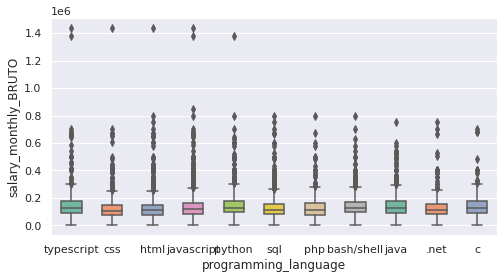

In [ ]:
# 4) Hacer un boxplot de de los lenguajes más populares y eliminar outliers 
sns.set(rc={"figure.figsize":(8, 4)})
box = sns.boxplot(x = 'programming_language', y = 'salary_monthly_BRUTO', data= df_salary_ok_PL, width=0.5, fliersize=5,palette="Set2")
box

In [ ]:
#Eliminamos los sueldos bruto mayores a $310.000 que en todos los casos son outliers
df_filtro = df_salary_ok_PL[(df_salary_ok_PL.salary_monthly_BRUTO < 310000)]

In [ ]:
# se eliminaron el 4% de los casos, se considera aceptable y se continua con la base filtrando los outliers 
# de mayores a $310.000
len(df_salary_ok_PL.index)
len(df_filtro.index)
print((len(df_filtro.index)/len(df_salary_ok_PL.index)-1)*100)

-4.051324700011882


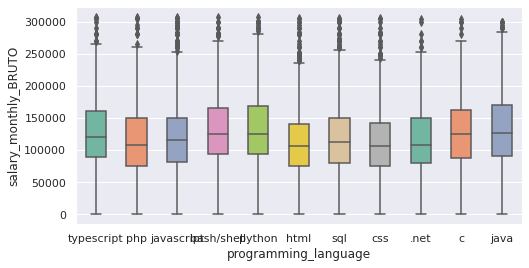

In [ ]:
#Volvemos a hacer un boxplot de los lenguajes más populares y verificamos outliers 
sns.set(rc={"figure.figsize":(8, 4)})
box = sns.boxplot(x = 'programming_language', y = 'salary_monthly_BRUTO', data= df_filtro, width=0.5, fliersize=5,palette="Set2")
box

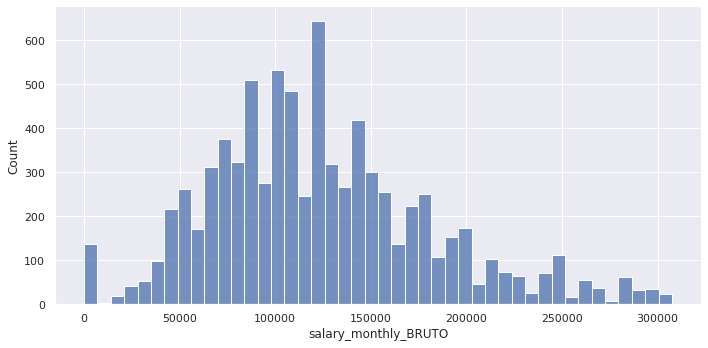

In [ ]:
# Se realiza un gráfico de la distribución de la variable "salary_monthly_BRUTO"
sns.displot(df_filtro.salary_monthly_BRUTO, aspect=2)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df_filtro_min = df_filtro[df_filtro.salary_monthly_BRUTO < 50000]
df_filtro_min

,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,studies,profile_years_experience,company_employee_number,profile_gender,cured_programming_languages,control
1884,php,"CSS, HTML, Javascript, PHP, SQL, TypeScript",49850.0,40030.0,terciario incompleto,2.0,51-100,Hombre,"[css, html, javascript, php, sql, typescript]",1.245316
1884,javascript,"CSS, HTML, Javascript, PHP, SQL, TypeScript",49850.0,40030.0,terciario incompleto,2.0,51-100,Hombre,"[css, html, javascript, php, sql, typescript]",1.245316
1884,html,"CSS, HTML, Javascript, PHP, SQL, TypeScript",49850.0,40030.0,terciario incompleto,2.0,51-100,Hombre,"[css, html, javascript, php, sql, typescript]",1.245316
1884,sql,"CSS, HTML, Javascript, PHP, SQL, TypeScript",49850.0,40030.0,terciario incompleto,2.0,51-100,Hombre,"[css, html, javascript, php, sql, typescript]",1.245316
1884,typescript,"CSS, HTML, Javascript, PHP, SQL, TypeScript",49850.0,40030.0,terciario incompleto,2.0,51-100,Hombre,"[css, html, javascript, php, sql, typescript]",1.245316
...,...,...,...,...,...,...,...,...,...,...
2003,php,"Javascript, PHP, SQL",47.0,39.0,universitario en curso,2.0,11-50,Hombre,"[javascript, php, sql]",1.205128
2003,sql,"Javascript, PHP, SQL",47.0,39.0,universitario en curso,2.0,11-50,Hombre,"[javascript, php, sql]",1.205128
2352,html,HTML,36.6,30.0,terciario completado,2.0,11-50,Mujer,[html],1.220000
2467,css,"HTML, Css",23.0,18.0,universitario incompleto,10.0,11-50,Mujer,"[html, css]",1.277778


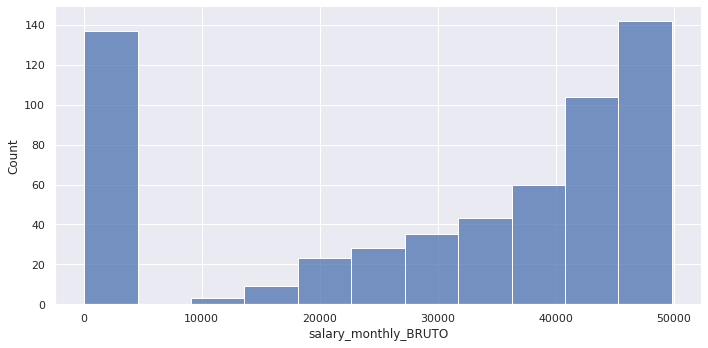

In [ ]:
#Según Glassdoor, un developer en 2020 en argentina, gana en promedio $65.000 mensuales pero puede ganar desde $36.000 
#hasta más de $110.000. En base a este dato se toma cómo límite inferior para definir outliers los sueldos menores a $36.000
# Se realiza otro grafico de la distribución del salario mensual bruto pero considerando los valores más bajos.
sns.displot(df_filtro_min.salary_monthly_BRUTO, aspect=2)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
#Filtramos los outliers para obtener la base "curada" que llamamos df_PL_ok (data frame/lenguajes más populares/ok)

df_PL_ok = df_salary_ok_PL[(df_salary_ok_PL.salary_monthly_BRUTO > 36000)
        &(df_salary_ok_PL.salary_monthly_BRUTO < 300000)]

In [ ]:
# De 8417 casos iniciales, se eliminaron los outliers y nos quedamos con 7750, la reduccion de casi el 8% es aceptable, 
# asi que continuamos el análisis con esta base.
print((len(df_PL_ok.index)/len(df_salary_ok_PL.index)-1)*100)

-7.9244386360936225


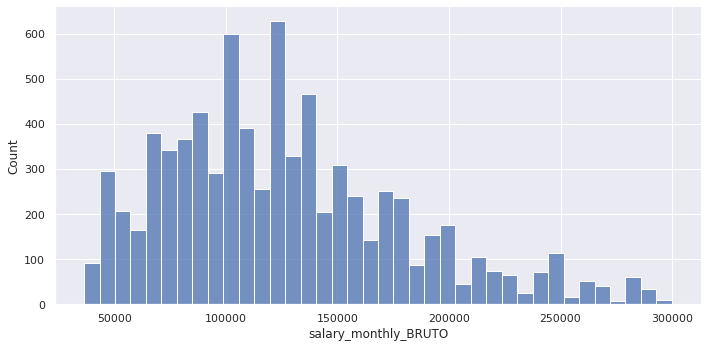

In [ ]:
#Volvemos a realizar un gráfico de la distribución de los salarios mensuales brutos habiendo filtrado los outliers
sns.displot(df_PL_ok.salary_monthly_BRUTO, aspect=2)
plt.ticklabel_format(style='plain', axis='x')

Nuestra base curada es: df_PL_ok: se obtuvo a partir de:
1. eliminar del análisis casos en donde el sueldo bruto y neto no mostraran una relación lógica deacuerdo a la ley que rige las liquidaciones de salarios en la argentina.
2. limitar el universo de análisis a los lenguajes más populares, definidos a partir de aquellos que concentrara el 80% de los casos encuestados
3. eliminar los outlier máximos y mínimos

> Aclaraciones y limitacións observadas: al desagregar aquellos casos en donde se informaban varios lenguajes de programación por persona, se termina asignando el mismo sueldos promedio a todos los lenguages de esa persona. Esto podría provocar un error de interpretación al suponer que la ponderación de los lenguajes es idéntica. Puede que una persona que sea especialista en un lenguaje muy exclusivo, hoy esté cobrando un salario mayor al promedio, pero ese salario se replica en todos los demás lenguajes que esta persona conoce igualándolos.



# 3) Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
1. Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.

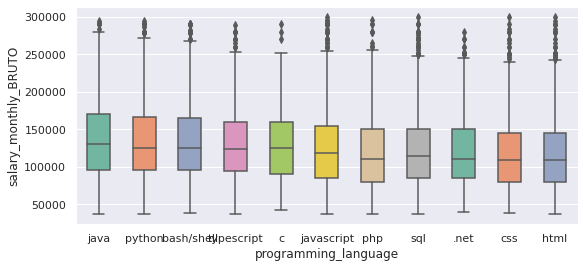

In [ ]:
from numpy.lib.function_base import median
#Se propone hacer un boxplot/Subplot y cálculo de la media, a los fines de obtener conclusiones sobre la distribución de los valores 
#Limitaremos nuestro universo de análisis a la base de lenguajes más populares df_PL_ok
sns.set(rc={"figure.figsize":(9, 4)})
box = sns.boxplot(x = 'programming_language', y = 'salary_monthly_BRUTO', data=df_PL_ok, order=[ 
                 'java','python', 'bash/shell','typescript',  'c','javascript','php','sql', '.net' , 'css', 'html'], width=0.5, fliersize=5,palette="Set2")
box


In [ ]:
df_PL_ok.salary_monthly_BRUTO. mean()

126470.60101548384

In [ ]:
# Filtramos el dataframe por cada lenguaje seleccionado anteriormente 
java = df_PL_ok[(df_PL_ok.programming_language == 'java')]
python = df_PL_ok[(df_PL_ok.programming_language == 'python')]
typescript = df_PL_ok[df_PL_ok.programming_language == 'typescript']
bash_shell = df_PL_ok[df_PL_ok.programming_language == 'bash/shell']
c = df_PL_ok[df_PL_ok.programming_language == 'c']
javascript = df_PL_ok[df_PL_ok.programming_language == 'javascript']
sql = df_PL_ok[df_PL_ok.programming_language == 'sql']
net = df_PL_ok[df_PL_ok.programming_language == '.net']
php = df_PL_ok[df_PL_ok.programming_language == 'php']
css = df_PL_ok[df_PL_ok.programming_language == 'css']
html= df_PL_ok[df_PL_ok.programming_language == 'html']

In [ ]:
format(round(java.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'137.115,61'

In [ ]:
format(round(python.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'134.828,8'

In [ ]:
format(round(bash_shell.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'133.823,84'

In [ ]:
format(round(typescript.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'131.997,62'

In [ ]:
format(round(c.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'128.273,07'

In [ ]:
format(round(javascript.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'124.722,69'

In [ ]:
format(round(php.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'123.864,13'

In [ ]:
format(round(sql.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'122.324,73'

In [ ]:
format(round(net.salary_monthly_BRUTO.mean(),2),',').replace(",", "@").replace(".", ",").replace("@", ".")


'119.674,79'

Punto 3 : conclusiones
Al analizar los lenguajes de programación más populares podemos concluir que:
1. La distribución de los salarios brutos con respecto a su media y mediana son similares en todos los lenguajes.
2. htlm, .net y css muestran una proporción mayor de sueldos bajos con respecto a lenguajes como java, pithon y bash_shell. Esta tendencia se observa también al observar los salarios más cercanos al máximo y al mínimo, por lo que podemos inferir que: observando los lenguajes más populares, hay mayor probabilidad de cobrar sueldos más altos si se programa con java, python y bash_shell que si usamos htlm, css y .net. 
3. Más allá de lo mencionado en el punto anterior, la dispersión de sueldos brutos según el lenguaje de programación es baja: el salario medio del lenguaje mejor pago está a solo un 14% por encima de la media del lenguaje menos pago.
5. Aclaraciones y limitaciones observadas: al desagregar aquellos casos en donde se informaban varios lenguajes de programación por persona, se termina asignando el mismo sueldos promedio a todos los lenguajes de esa persona. Esto podría provocar un error de interpretación al suponer que la ponderación de los lenguajes es idéntica. Puede darse el caso de una persona que sea especialista en un lenguaje muy exclusivo, hoy esté cobrando un salario mayor al promedio, pero ese salario se replica en todos los demás lenguajes que esta persona conoce igualándolos.


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

1. y 2. seleccionamos las misma columnas relevantes y trabajaremos sobre el mismo data frame "curado" obtenido en el ejercicio 1: df_PL_ok. Esto por considerar que los datos de salario bruto y neto son confiables y que la población de "lenguajes más populares" contiene suficientes datos sobre el data frame original (más del 90%)

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




**Variables numéricas**: salario bruto, cantidad de empleados en la compañía y cantidad de años de experiencia.

**Variables categóricas**: género y nivel de estudio


In [ ]:
df_PL_ok.columns

Index(['programming_language', 'tools_programming_languages',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'studies',
       'profile_years_experience', 'company_employee_number', 'profile_gender',
       'cured_programming_languages', 'control'],
      dtype='object')

In [ ]:
# Para analizar la relación de las variables categóricas entre sí, creamos una crosstab que nos permita visualizar la frecuencia de la intersección en ambas.

x = pd.crosstab(df_PL_ok.profile_gender, df_PL_ok.studies) 

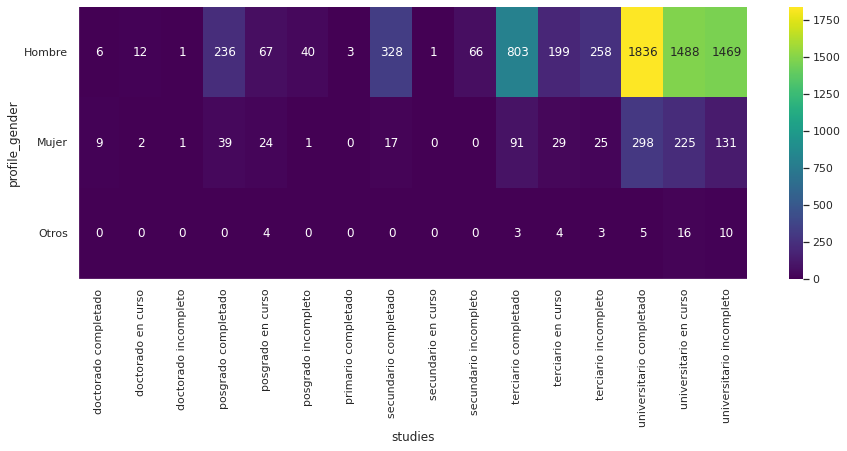

In [ ]:
figure = plt.figure(figsize = (15,5))
sns.color_palette("viridis", as_cmap=True)

sns.heatmap(x, annot=True, fmt='g', cmap = 'viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns.despine()

Conclusiones:
1. El 88% de los programadores de leguajes más populares son hombres.
2. El 67% de los programadores por lo menos termino la universidad. Del resto un 22% estudia una carrera universitaria y el  11% no terminó sus estudios universitarios o tienen un nivel de estudio menor.
3. La mayoría de los programadores son hombre  y tienen por lo menos el nivel universitario terminado 

In [ ]:
# Separamos los números de la cantidad de empleados de las empresas 
df_PL_ok['company_employee_number'] = df_PL_ok['company_employee_number'].str.replace('+','')

df_PL_ok['max_number'] = df_PL_ok['company_employee_number'].map(lambda x: x.split('-')[-1]).astype(int)
df_PL_ok['min_number'] = df_PL_ok['company_employee_number'].map(lambda x: x.split('-')[0]).astype(int)

# Ahora categorizamos las empresas en Grandes y PyMe segun la cantidad de empleados que tienen, con la categorización
# que se utiliza actualmente en Argentina 
df_PL_ok['company'] = ["Grande" if s >= 500 else "PyMe" for s in df_PL_ok['max_number']] 

# Visualizamos parte del data frame que acabamos de crear
df_PL_ok[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd

,programming_language,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,studies,profile_years_experience,company_employee_number,profile_gender,cured_programming_languages,control,max_number,min_number,company
4708,css,"CSS, HTML, Javascript, SQL",299902.0,167776.0,secundario completado,18.0,51-100,Hombre,"[css, html, javascript, sql]",1.787514,100,51,PyMe
4708,html,"CSS, HTML, Javascript, SQL",299902.0,167776.0,secundario completado,18.0,51-100,Hombre,"[css, html, javascript, sql]",1.787514,100,51,PyMe
4708,sql,"CSS, HTML, Javascript, SQL",299902.0,167776.0,secundario completado,18.0,51-100,Hombre,"[css, html, javascript, sql]",1.787514,100,51,PyMe
4708,javascript,"CSS, HTML, Javascript, SQL",299902.0,167776.0,secundario completado,18.0,51-100,Hombre,"[css, html, javascript, sql]",1.787514,100,51,PyMe
2175,javascript,"Javascript, PHP",295000.0,200000.0,universitario en curso,11.0,51-100,Hombre,"[javascript, php]",1.475000,100,51,PyMe
2175,php,"Javascript, PHP",295000.0,200000.0,universitario en curso,11.0,51-100,Hombre,"[javascript, php]",1.475000,100,51,PyMe
4665,javascript,"HTML, Java, Javascript, Kotlin, Python, Scala",293995.0,192072.0,terciario incompleto,21.0,1-10,Hombre,"[html, java, javascript, kotlin, python, scala]",1.530650,10,1,PyMe
4665,html,"HTML, Java, Javascript, Kotlin, Python, Scala",293995.0,192072.0,terciario incompleto,21.0,1-10,Hombre,"[html, java, javascript, kotlin, python, scala]",1.530650,10,1,PyMe
4665,python,"HTML, Java, Javascript, Kotlin, Python, Scala",293995.0,192072.0,terciario incompleto,21.0,1-10,Hombre,"[html, java, javascript, kotlin, python, scala]",1.530650,10,1,PyMe
4665,java,"HTML, Java, Javascript, Kotlin, Python, Scala",293995.0,192072.0,terciario incompleto,21.0,1-10,Hombre,"[html, java, javascript, kotlin, python, scala]",1.530650,10,1,PyMe


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


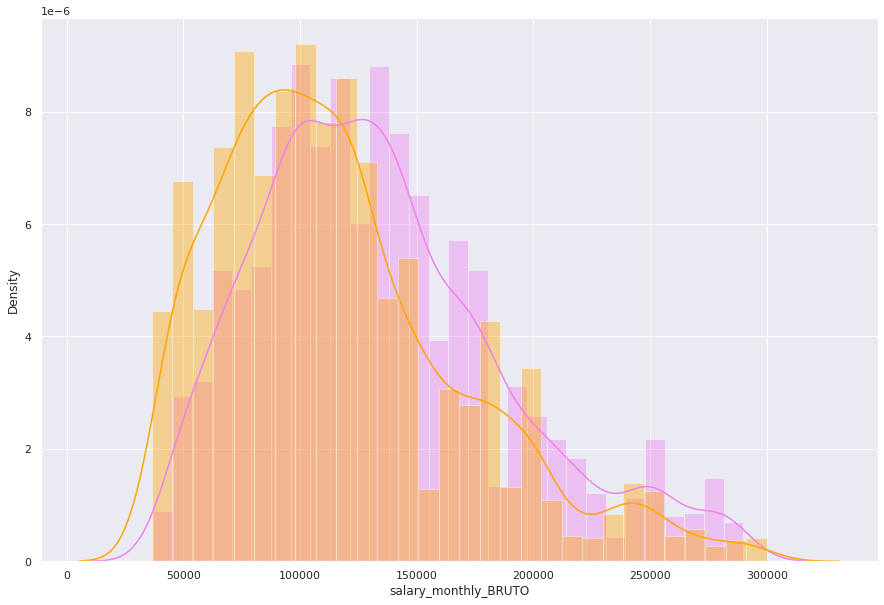

In [ ]:
# Con estos gráficos se visualiza como es la distribución del salario de acuerdo a si la empresa es grande o pequeña/mediana
# esto se realiza con el propósito de analizar si esta difiere demasiado dependiendo del tipo de empesa. Se puede pensar
# que las empresas grandes pagan mayores salarios que las pequeñas, por el volumen de operaciones que manejan respectivamente. 

df_big= df_PL_ok[df_PL_ok['company']=='Grande']
df_pyme= df_PL_ok[df_PL_ok['company']=='PyMe']


x = plt.figure(figsize = (15, 10))

sns.distplot(df_big.salary_monthly_BRUTO, color='violet')
sns.distplot(df_pyme.salary_monthly_BRUTO, color='orange')


In [ ]:
# Calculamos las medias de cada distribución 
media_big = df_PL_ok[df_PL_ok['company']=='Grande'].salary_monthly_BRUTO.mean()
media_pyme = df_PL_ok[df_PL_ok['company']=='PyMe'].salary_monthly_BRUTO.mean()

print(round(media_big))
print(round(media_pyme))

dif_medias = media_big - media_pyme
print(round(dif_medias))

134124
116424
17699


Si bien las medias difieren, es una diferencia de 17699 pesos, la cual no se considera que sea muy significativa, además es notorio que las distribuciones se asemejan bastante entre sí. Dicho todo esto, parece haber evidencia de que el tamaño de las empresas no influye de forma significativa en los salarios. 

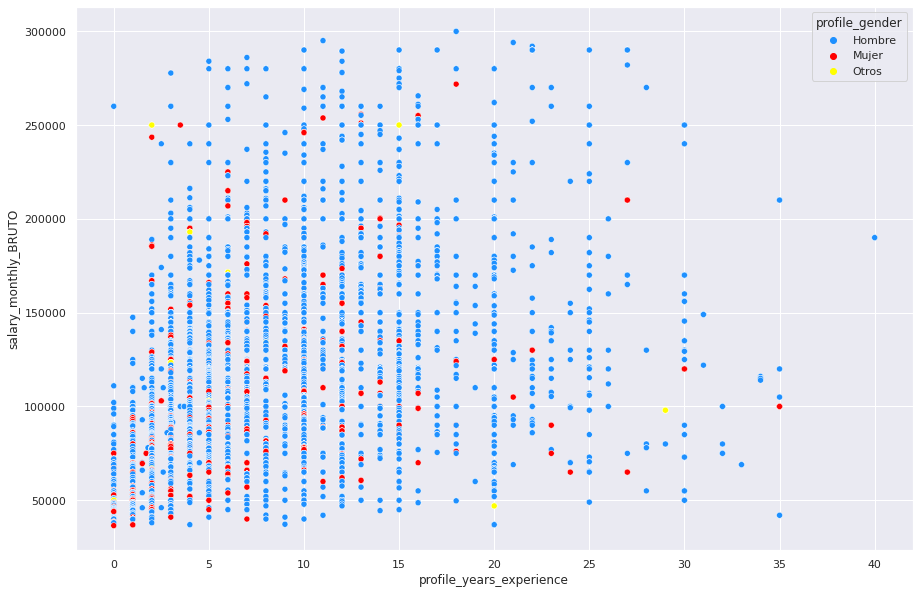

In [ ]:
# Este scatterplot nos da una pauta de que más experiencia no significa un mayor salario, o por lo menos no esta totalmente
# correlacionado

# Filtramos para sacar los ouliers, no es posible que una persona tenga más de 60 años de experienca en el rubro.
df_PL_ok = df_PL_ok[df_PL_ok.profile_years_experience < 60]

fig = plt.figure(figsize = (15,10))
sns.scatterplot(data = df_PL_ok, x = 'profile_years_experience', y='salary_monthly_BRUTO', hue = 'profile_gender', palette = ['dodgerblue', 'red', 'yellow'])

In [ ]:
df_salary_experience = df_PL_ok[['salary_monthly_BRUTO', 'profile_years_experience']]
df_salary_experience.corr()

,salary_monthly_BRUTO,profile_years_experience
salary_monthly_BRUTO,1.000000,0.351616
profile_years_experience,0.351616,1.000000


In [ ]:
#No pareciera haber alguna correlación entre las variables salario y años de experiencia, sin embargo correlación no implica causalidad, por lo tanto
# vamos a sacar la probabilidad condicional de tener un A: sueldo alto dado que tengo B : muchos años de experiencia.

mean_salary = df_PL_ok.salary_monthly_BRUTO.mean()
#Elegimos los salarios por encima de la media y a partir de 10 años de experienca
p_interseccion = len(df_PL_ok[(df_PL_ok.salary_monthly_BRUTO > mean_salary)&(df_PL_ok.profile_years_experience >= 10)])
# El evento que condiciona son los años de experiencia, por lo tanto se divide por P(B)
p_exp = len(df_PL_ok[df_PL_ok.profile_years_experience >= 10])

p_condicional = p_interseccion/p_exp
p_condicional

0.5818654345942824

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Filtrar datos erróneos como cuando el neto es mayor al 0.83% del bruto o que el bruto sea más del doble que el neto.

Por ley argentina al salario bruto se deben deducir 17% de aportes que van a pagar el fondo de jubilacion y pensiones, la obra social y pami.
Además de ello, puede (dependiendo de los gastos deducibles que cada individuo tenga) sufrir una retencion adicional del 33% del sub-neto. Esto equivaldría que en el peor de los casos un individuo puede, cuando mucho, sufrir una retención sobre el bruto del 50% ,pero no más.

Gráfico de dispersión.

Calcular el coeficiente de correlación entre las dos variables.

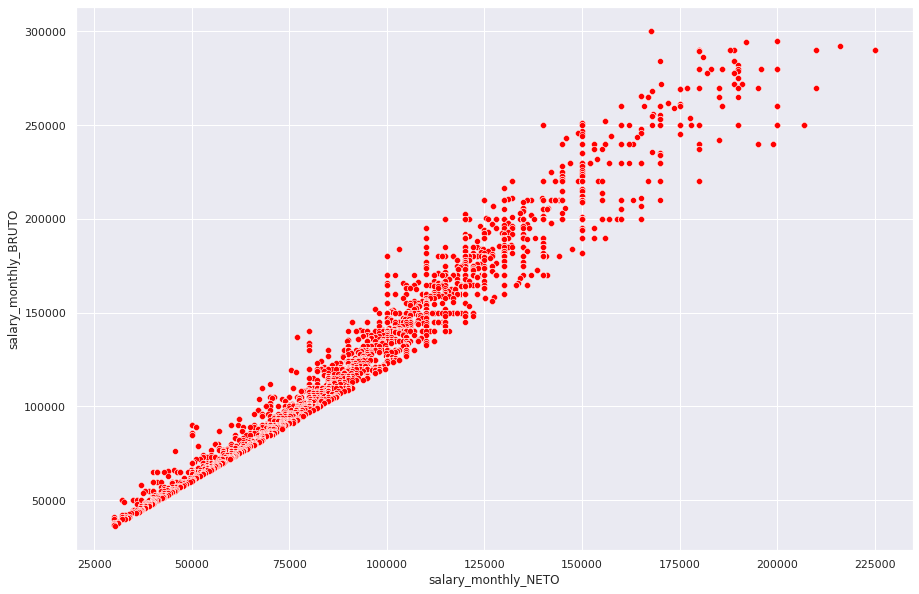

In [ ]:
# Se realiza un gráfico de dispersión utilizando el dataframe "curado", considerando erróneo aquellos salarios netos 
# que no sean al menos un 17% menores que el bruto. 

fig = plt.figure(figsize = (15, 10))
sns.scatterplot(data = df_PL_ok, x = 'salary_monthly_NETO', y = 'salary_monthly_BRUTO', color = 'red')

In [ ]:
salario = df_PL_ok[['salary_monthly_BRUTO', 'salary_monthly_NETO']]
salario.corr()

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.981286
salary_monthly_NETO,0.981286,1.000000


In [ ]:
df_salarios_altos = df_PL_ok[(df_PL_ok.salary_monthly_NETO >= 150000)]
salario = df_salarios_altos[['salary_monthly_BRUTO', 'salary_monthly_NETO']]
salario.corr()

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.716574
salary_monthly_NETO,0.716574,1.000000


Tanto el gráfico de dispersión como la matriz de correlación muestran una alta correlación entre el salario bruto y el salario neto. Recordamos que estamos trabajando sobre una base curada en donde se eliminaron aquellos datos en los que la relación entre salario bruto y neto no fuera lógica dentro de los parámetros legales argentinos.

Por La alta correlación que guardan estas variables podemos inferir que podemos trabajar indistintamente con los sueldos brutos o neto.

Se observa también que la correlación está muy sesgada por el nivel de salarios . A medida que los salarios son más alto, la dispersión entre salarios netos y bruto se incrementa, posiblemente por el efecto de retención de impuesto a las ganancias que afecta significativamente a sueldos bruto mayores a $150.000 en adelante.

Por lo analizado concluimos: 
1. si se va a trabajar sobre la totalidad de los datos del data frame sin discriminar nivel de sueldos podemos decir que la relación entre sueldo bruto y neto es bastante lineal, podemos tomar una columna u otra.
2. si vamos a discriminar por nivel de sueldos, a medida que trabajemos con sueldos mayores a $150.000, ambas columnas comenzarán a mostrar valores cada vez más disimiles, por lo que NO podemos afirmar que es indiferente trabajar sobre sueldos bruto o netos, debido al efecto distorsivo de retención del impuesto a las ganancias. 

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
df_PL_ok = df_PL_ok.drop(df_PL_ok[df_PL_ok.studies == 'ninguno'].index)

studies_count = df_PL_ok.studies.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'level_studies', 'studies': 'frequency'})
studies_count[:40]

,level_studies,frequency
0,universitario completado,2139
1,universitario en curso,1729
2,universitario incompleto,1608
3,terciario completado,897
4,secundario completado,345
5,terciario incompleto,286
6,posgrado completado,275
7,terciario en curso,232
8,posgrado en curso,95
9,secundario incompleto,66


**1) Analizamos las poblaciones de universitario completado y universitario en curso**

In [ ]:
# Filtramos por aquellas personas con universitario completo
UniversitarioCompleto = df_PL_ok[(df_PL_ok.studies == 'universitario completado')]

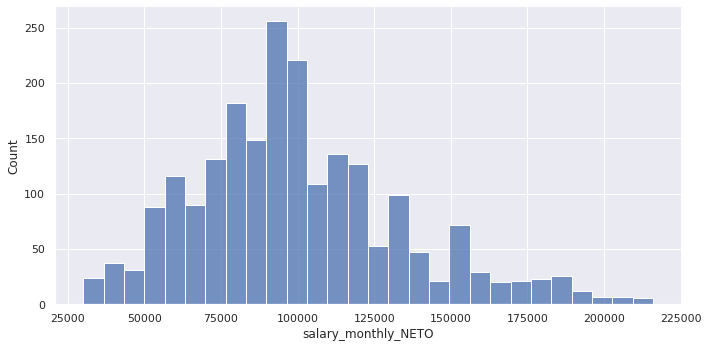

In [ ]:
# histograma: Universitario Completo
sns.displot(UniversitarioCompleto.salary_monthly_NETO, aspect=2)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
# Realizamos los mismos pasos pero con las personas que tienen universitario en curso:
UniversitarioEnCurso = df_PL_ok[(df_PL_ok.studies == 'universitario en curso')]

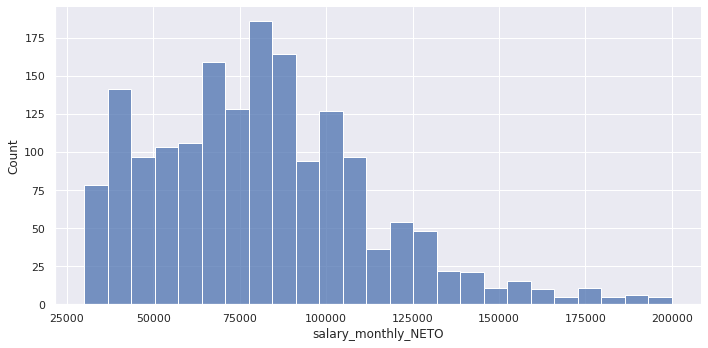

In [ ]:
# histograma: Universitario en curso
sns.displot(UniversitarioEnCurso .salary_monthly_NETO, aspect=2)
plt.ticklabel_format(style='plain', axis='x')

**2) Analizamos si ambas poblaciones son independientes o no**

Se supone que las dos muestras se consideran independientes ya que las respuestas de nivel de estudio son únicas y exclusivas de una sola persona, se han obtenido de forma aleatoria y no guardan relación unas con otras.

Al tener que analizar los sueldos netos(variables numérica) de dos variables categóricas (universitario completo y en curso) se propone analizar su independencia con la prueba t de Student, en donde podremos determinar si las medias calculadas en cada caso, provienen de poblaciones con la misma media o no.
En caso de que las poblaciones no tienen la misma media podemos inferir que ambas son independientes.

Ho:u1=u2

Para ello se deben dar 3 supuestos:
1. Independencia: se supone que las dos muestras se consideran independientes ya que las respuestas de nivel de estudio son únicas y exclusivas de una sola persona, se han obtenido de forma aleatoria y no guardan relación unas con otras.
2. Normalidad: ambas poblaciones deben mostrar una distribución aproximadamente normal: Analizando los boxplot del punto siguiente, como los histogramas del punto anterior, podemos observar que las distribuciones son bastante normales, con medianas muy cercanas a la media y gran parte de los datros concentrados alrededor de la media. Así mismo, aún cuando muestran cierta asimetría, (especialmente en "universitarios en curso"), se supone que los t-test son considerablemente robustos dado que el tamaño de las muestras es mayor a 30, por lo que consideramos que este requisito también se cumple.
3. Las varianzas de ambas poblaciones deben ser iguales: para ello hicimos el test de Bartlett al suponer que ambas distribuciones son normales. El p_valor calculado es mucho menor a 0.05 por lo que se infiere que ambas varianzas son similares.

In [ ]:
from scipy import stats
plt.style.use('ggplot')

In [ ]:
U= df_PL_ok[(df_PL_ok.studies == 'universitario completado')]
U_SN=U.salary_monthly_NETO
UC= df_PL_ok[(df_PL_ok.studies == 'universitario en curso')]
UC_SN=UC.salary_monthly_NETO
bartlett_test = stats.bartlett(U_SN, UC_SN)
bartlett_test

BartlettResult(statistic=11.450845405185198, pvalue=0.0007146148071910903)

In [ ]:
#el test de levene también confirma que las varianzas de ambas poblaciones son idénticas
stats.levene (U_SN, UC_SN)

LeveneResult(statistic=5.057726824802032, pvalue=0.0245724500535529)

Hacer el test de hipotesis. si rechazamos la hipotesis nula, entonces podemos concluir que ambas variables son independiente entre sí:
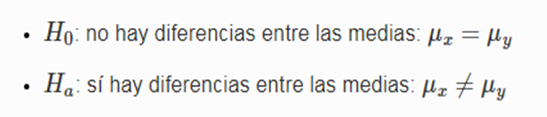



In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#el p-valor es muy bajo y mucho menor a 0.05 por lo que se rechaza la hipotesis nula: ambas variables son independientes.
stats.ttest_ind (U_SN, UC_SN, equal_var = True)

Ttest_indResult(statistic=16.995444896179922, pvalue=1.5717433546128384e-62)

**3) Analizamos la distribucion de los datos**

In [ ]:
# Medidas de distribucion : Universitario Completo
UniversitarioCompleto['salary_monthly_NETO'].describe().round()

count      2139.0
mean      99625.0
std       34281.0
min       30000.0
25%       77000.0
50%       95000.0
75%      120000.0
max      216000.0
Name: salary_monthly_NETO, dtype: float64

In [ ]:
# Medidas de distribucion : Universitario en curso
UniversitarioEnCurso['salary_monthly_NETO'].describe().round()

count      1729.0
mean      81399.0
std       31720.0
min       30000.0
25%       58000.0
50%       80000.0
75%       99900.0
max      200000.0
Name: salary_monthly_NETO, dtype: float64

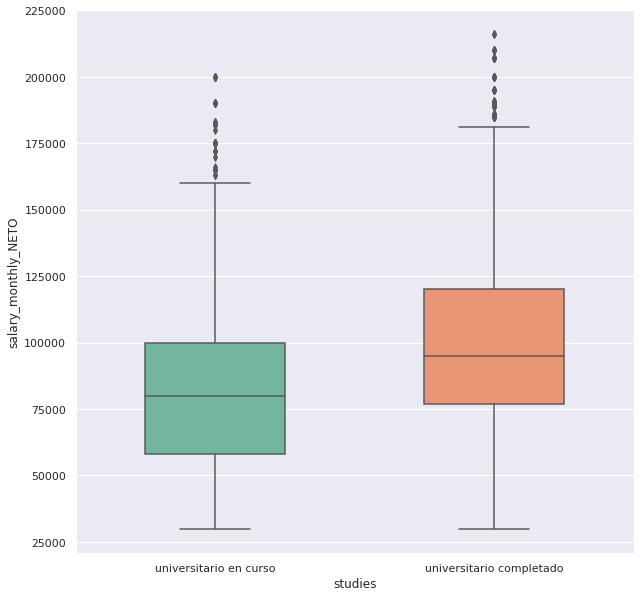

In [ ]:
# Boxplot con la parte de la población que terminó la universidad y quienes todavía no se reciben
fig = plt.figure(figsize = (10, 10))
box = sns.boxplot(x = 'studies', y = 'salary_monthly_NETO', data=df_PL_ok, order=['universitario en curso', 'universitario completado'], width=0.5, fliersize=5,palette="Set2")
# Removemos la notación científica
plt.ticklabel_format(style='plain', axis='y')

Conclusiones:
1. Las distribuciones de ambas variables con respecto a su media son muy parecidas, pero hay proporcionalmente salarios más altos en la población "universitarios completados", su media está mas influenciada por los salarios altos que en el caso de las personas que aún están estudiando.
1. Mientras que el salario neto promedio de quienes poseen un nivel de estudio **universitario completado** es de \$ 99.625, para los que poseen un nivel de estudio **universitario en curso** es de \$ 81.399.
2. Hay mas posibilidades de cobrar salarios mas altos si tenemos universitario completo
3. Por otro lado, cuando se comparan dos características diferentes (que pueden tener magnitudes diferentes) puede no ser conveniente comparar directamente los valores de las desviaciones estándar, sino que podemos usar el coeficiente de variación (desviación estándar dividida la media).

In [ ]:
import scipy

print("Coeficiente de variación salario Neto de Universitario Completo",
      scipy.stats.variation(UniversitarioCompleto.salary_monthly_NETO.dropna()))
print("Coeficiente de variación salario Neto de Universitario en Curso",
      scipy.stats.variation(UniversitarioEnCurso.salary_monthly_NETO.dropna()))

Coeficiente de variación salario Neto de Universitario Completo 0.34402164996566753
Coeficiente de variación salario Neto de Universitario en Curso 0.38956760923299966


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

Variables: work_years_in_company  y salary_monthly_BRUTO con work province, para ver como influyen los años en la compañía, comparando por provincia que trabajan.


In [ ]:
# Vamos a utilizar el dataframe original pero filtrado por los siguientes criterios
filtered_df = df[(df.salary_monthly_BRUTO < 700000)
              &(df.salary_monthly_BRUTO > 30000)
              &(df.profile_years_experience >= 5)
              &(df.profile_years_experience < 50)
              &(df.profile_age < 70)]

In [ ]:
# Hacemos 4 grupos de provincias para que al aplicar el "hue" sea más fácil visualizar algun patrón o comportamiento de los datos
provinces_1 = ['Catamarca', 'Formosa', 'Tucumán', 'Chaco', 'Santiago del Estero', 'Jujuy', 'Salta', 'Misiones']
provinces_2 = ['Corrientes', 'Ciudad Autonoma de Buenos Aires', 'Entre Ríos', 'GBA', 'Santa Fe', 'Provincia de Buenos Aires']
provinces_3 = ['Córdoba', 'Mendoza', 'La Rioja', 'San Luis', 'San Juan', 'La Pampa']
provinces_4 = ['Chubut', 'Neuquén', 'Río Negro', 'Tierra del Fuego', 'Santa Cruz']

In [ ]:
# Filtramos el dataframe segun los grupos de provincias
filtered_df_1 = filtered_df[filtered_df.work_province.isin(provinces_1)]
filtered_df_2 = filtered_df[filtered_df.work_province.isin(provinces_2)]
filtered_df_3 = filtered_df[filtered_df.work_province.isin(provinces_3)]
filtered_df_4 = filtered_df[filtered_df.work_province.isin(provinces_4)]

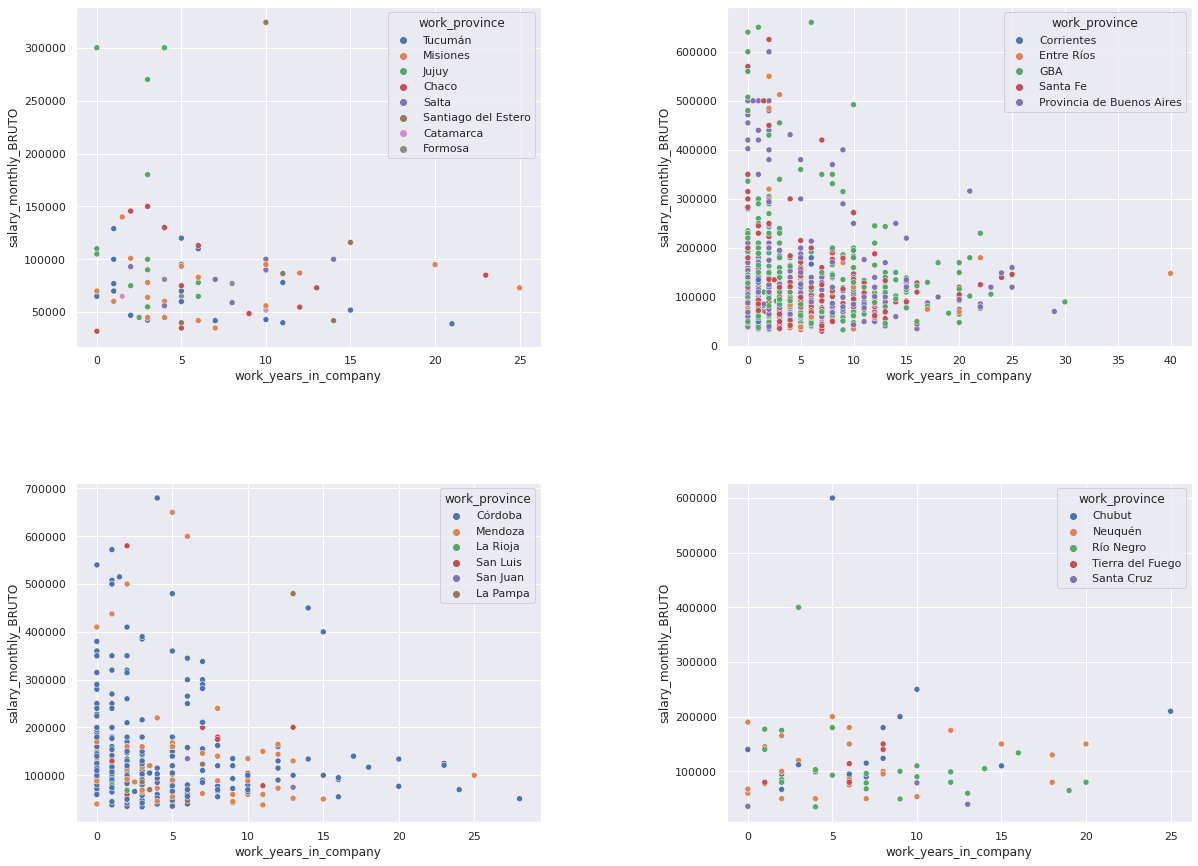

In [ ]:
# Realizamos 4 gráficos en base a los distintos grupos de provincias
fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data = filtered_df_1, x = 'work_years_in_company', y='salary_monthly_BRUTO', hue = 'work_province', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(data = filtered_df_2, x = 'work_years_in_company', y='salary_monthly_BRUTO', hue = 'work_province', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(data = filtered_df_3, x = 'work_years_in_company', y='salary_monthly_BRUTO', hue = 'work_province', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(data = filtered_df_4, x = 'work_years_in_company', y='salary_monthly_BRUTO', hue = 'work_province', ax=ax)
plt.show()

No se exhibe ningún patrón claro que nos indique que la cantidad de años en la misma compañía se traduzca en un mayor salario y esto tampoco depende de la provincia donde esta trabajando la persona. 

En cuanto a esto último, las provincias más grandes como Córdoba y Buenos Aires tienen un mayor porcentaje de gente trabajando en este rubro. Esto se refleja a través de puntos que parecen estar concentrados en la parte de 0 a 5 años trabajando en la compañía y en salarios por debajo de los 300 mil, sin embargo esto resulta engañoso dado que puede deberse sólo al hecho de que hay más datos disponibles de estas provincias. 

En conclusión, no pareciera haber evidencia de que hay provincias con mejores salarios para quienes se dedican a la programación. Esta lógica es coherente con el hecho de que si hubiera provincias con mejor oportunidades, todos los programadores se concentrarían en las mismas. 